https://github.com/sychi77/Thoracic_Surgery_Patient_Survival/blob/master/ThoracicSurgery.ipynb

# Thoracic Surgery for Lung Cancer

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('ThoracicSurgery.csv')

In [3]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [4]:
df.describe()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
count,454.000000,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.092511,3.287952,2.51685,0.795154,0.059471,0.136564,0.055066,0.696035,0.171806,1.733480,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.715817,0.872347,0.77189,0.531459,0.236766,0.343765,0.228361,0.460475,0.377628,0.707499,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.000000,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,3.000000,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.000000,3.160000,2.36000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.000000,3.840000,2.97750,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,8.000000,6.300000,5.48000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [5]:
# Stats for live and death after 1 yr patients
live = df[df['Death_1yr'] == 0]
death = df[df['Death_1yr'] == 1]

cond = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
        'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']

l = [np.mean(live[c]) for c in cond]
d = [np.mean(death[c]) for c in cond]

ld = pd.DataFrame(data={'Attribute': cond, 'Live 1yr Mean': l, 'Death 1yr Mean': d})
ld = ld.set_index('Attribute')

print('Death: {:d}, Live: {:d}'.format(len(death), len(live)))
print("1 year death: {:.2f}% out of 454 patients".format(np.mean(df.Death_1yr)*100))
ld

Death: 69, Live: 385
1 year death: 15.20% out of 454 patients


,Live 1yr Mean,Death 1yr Mean
Attribute,,
FVC,3.304597,3.195072
FEV1,2.540805,2.383188
Performance,0.774026,0.913043
Pain,0.051948,0.101449
Haemoptysis,0.124675,0.202899
Dyspnoea,0.044156,0.115942
Cough,0.677922,0.797101
Weakness,0.158442,0.246377
Tumor_Size,1.683117,2.014493


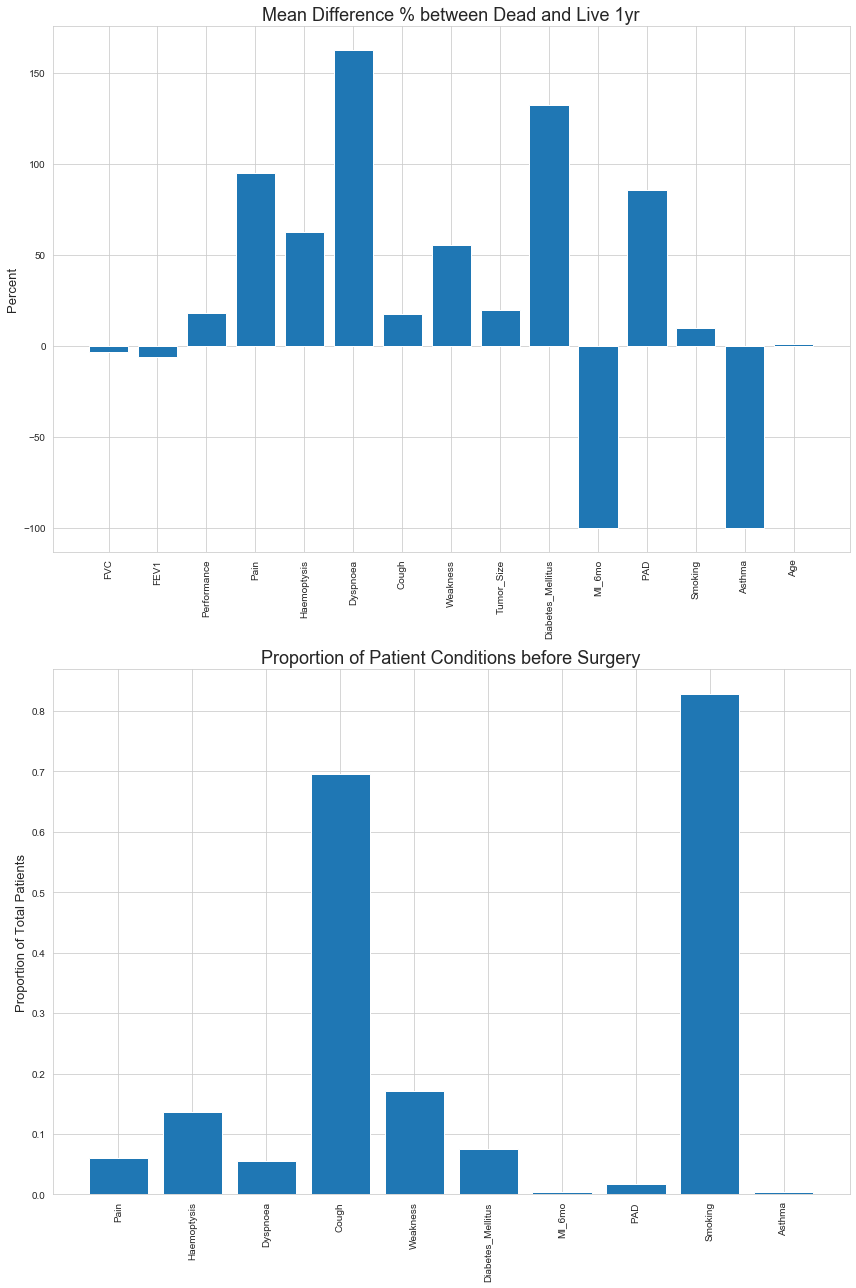

In [6]:
# Percentage difference in means of live vs death patients
d = np.array(d)
l = np.array(l)

p_diff = (d-l)/l*100

fig, axes = plt.subplots(2,1,figsize=(12,18))

axes[0].bar(cond, p_diff)
axes[0].set_title('Mean Difference % between Dead and Live 1yr', fontsize=18)
axes[0].set_xticks(cond)
axes[0].set_xticklabels(cond, rotation=90)
axes[0].set_ylabel('Percent', fontsize=13)

# Count plot of true/false condition columns

tf_col = ['Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma']
tf_sum = [df[col].sum()/454 for col in tf_col]

axes[1].bar(tf_col, tf_sum)
axes[1].set_xticks(tf_col)
axes[1].set_xticklabels(tf_col, rotation=90)
axes[1].set_ylabel('Proportion of Total Patients', fontsize=13)
axes[1].set_title('Proportion of Patient Conditions before Surgery', fontsize=18)

plt.tight_layout()

plt.show()


### Categorical Data (Diagnosis, Tumor_Size, Performance)

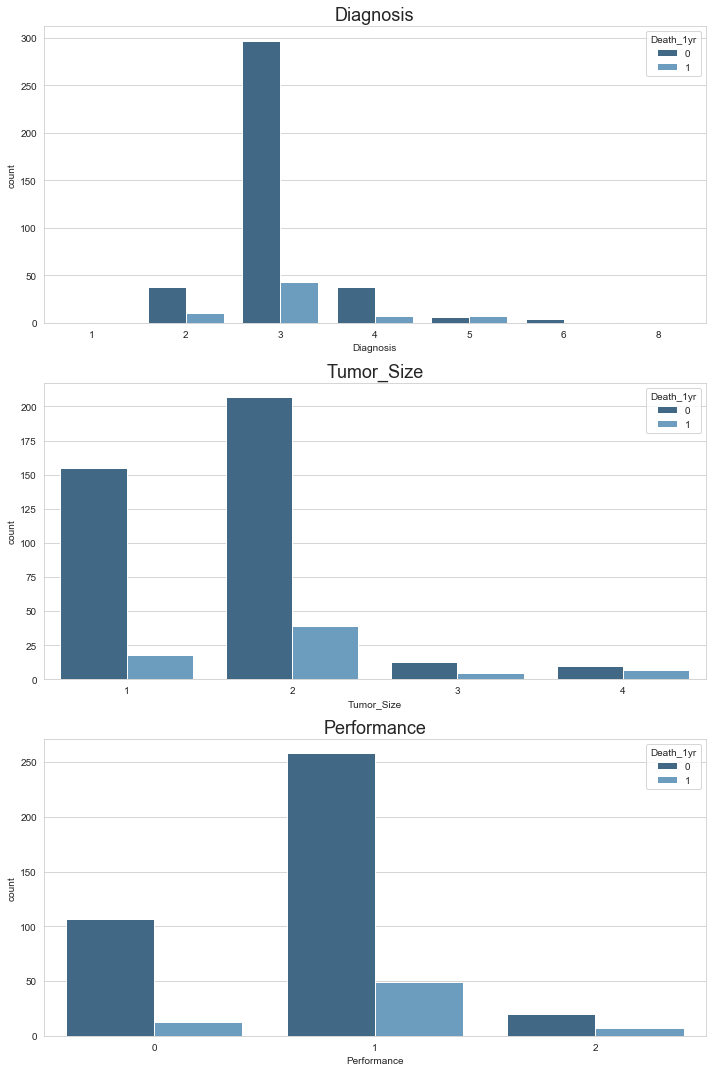

In [7]:
# Count plots of Diagnosis, Tumor_Size, Performance with difference of live and death data

fig, axes = plt.subplots(3,1,figsize=(10,15))

sns.countplot(x='Diagnosis', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[0]).set_title('Diagnosis', fontsize=18)
sns.countplot(x='Tumor_Size', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[1]).set_title('Tumor_Size', fontsize=18)
sns.countplot(x='Performance', hue='Death_1yr', data=df, palette='Blues_d', ax=axes[2]).set_title('Performance', fontsize=18)

plt.tight_layout()

In [8]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [9]:
# Hypothesis testing with Permutations of data
condition = ['FVC', 'FEV1', 'Performance', 'Pain', 'Haemoptysis', 'Dyspnoea', 'Cough', 'Weakness',\
             'Tumor_Size', 'Diabetes_Mellitus', 'MI_6mo', 'PAD', 'Smoking', 'Asthma', 'Age']
p_val = []

for c in condition:
    empirical_diff_means = diff_of_means(death[c], live[c])
    perm_replicates = draw_perm_reps(death[c], live[c], diff_of_means, size=10000)
    if empirical_diff_means > 0:
        p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)
    else:
        p = np.sum(perm_replicates <= empirical_diff_means) / len(perm_replicates)
        p_val.append(p)

print(list(zip(condition, p_val)))

[('FVC', 0.1692), ('FEV1', 0.0558), ('Performance', 0.0319), ('Pain', 0.0965), ('Haemoptysis', 0.0641), ('Dyspnoea', 0.0243), ('Cough', 0.03), ('Weakness', 0.0568), ('Tumor_Size', 0.0003), ('Diabetes_Mellitus', 0.0193), ('MI_6mo', 0.7175), ('PAD', 0.3491), ('Smoking', 0.0628), ('Asthma', 0.711), ('Age', 0.2808)]


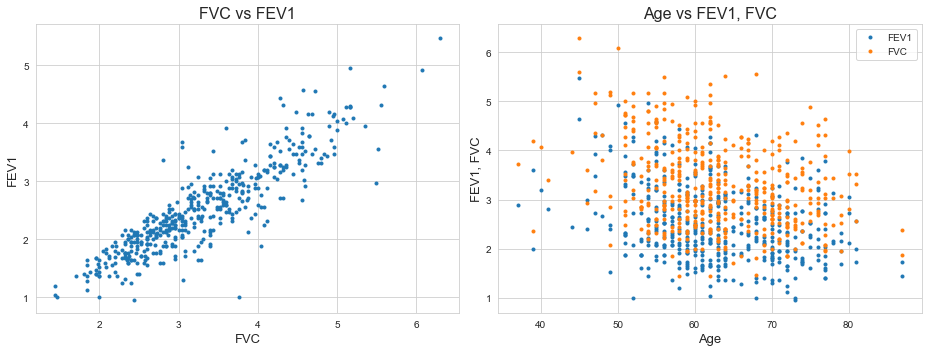

In [10]:
# Scatter plot for FVC, FEV1, Age columns

fig, axes = plt.subplots(1,2,figsize=(13,5))
axes[0].plot(df.FVC, df.FEV1, linestyle='none', marker='.')

axes[0].set_xlabel('FVC', fontsize=13)
axes[0].set_ylabel('FEV1', fontsize=13)
axes[0].set_title('FVC vs FEV1', fontsize=16)

axes[1].plot(df.Age, df.FEV1, linestyle='none', marker='.', label='FEV1')
axes[1].plot(df.Age, df.FVC, linestyle='none', marker='.', label='FVC')
axes[1].set_xlabel('Age', fontsize=13)
axes[1].set_ylabel('FEV1, FVC', fontsize=13)
axes[1].legend()
axes[1].set_title('Age vs FEV1, FVC', fontsize=16)

plt.tight_layout()